<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))
print("There are ", len(topics_df.topic_id.unique()), "topics in total.")

                 prof  ...                                       distribution
589   Cingolani12.txt  ...  [0.038537857681512834, 0.15144388433545827, 0....
177   Flachsland6.txt  ...  [0.07627074141055346, 0.045676767721306535, 0....
499    Iacovone22.txt  ...  [0.04274529697140679, 0.05629975848714821, 0.1...
365  Kreyenfeld21.txt  ...  [0.048536031902767715, 0.009598012728383764, 0...
230  Hallerberg29.txt  ...  [0.07201231634244323, 0.4630815215408802, 0.04...

[5 rows x 4 columns]
There are  14 topics in total.


## Create wide & long format

In [27]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 14)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.761311,0.057480,0.018308,0.005360,0.011729,0.009344,0.008888,0.053072,0.003732,0.012903,0.011730,0.006997,0.034081,0.005064
1,0.546687,0.083571,0.055169,0.032054,0.032806,0.020551,0.024105,0.038918,0.031414,0.014969,0.020595,0.015033,0.026796,0.057330
2,0.081703,0.018837,0.033404,0.071922,0.045205,0.291806,0.025276,0.013646,0.078218,0.237980,0.016144,0.049807,0.011770,0.024281
3,0.775538,0.127827,0.009821,0.004559,0.012252,0.007293,0.006242,0.021990,0.002604,0.007097,0.007869,0.005649,0.007621,0.003639
4,0.670124,0.035505,0.022101,0.016260,0.025384,0.016416,0.014526,0.046487,0.009201,0.016545,0.041123,0.013186,0.033493,0.039648


In [28]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [29]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
                 prof  topic_id  ...   Topic12   Topic13
0  Hammerschmid1.txt         0  ...  0.034081  0.005064
1  Hammerschmid2.txt         0  ...  0.026796  0.057330
2  Hammerschmid3.txt         5  ...  0.011770  0.024281
3  Hammerschmid4.txt         0  ...  0.007621  0.003639
4  Hammerschmid5.txt         0  ...  0.033493  0.039648

[5 rows x 17 columns]
This is the long format.
                 prof  topic_id  ...   topic topic_prop
0  Hammerschmid1.txt         0  ...  Topic0   0.761311
1  Hammerschmid2.txt         0  ...  Topic0   0.546687
2  Hammerschmid3.txt         5  ...  Topic0   0.081703
3  Hammerschmid4.txt         0  ...  Topic0   0.775538
4  Hammerschmid5.txt         0  ...  Topic0   0.670124

[5 rows x 5 columns]


## Stacked Bar Chart

In [30]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.238689
1      0.453313
2      0.918297
3      0.224462
4      0.329876
         ...   
804    0.715937
805    0.952766
806    0.815752
807    0.880109
808    0.981199
Length: 809, dtype: float64

In [31]:
# Remove number from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '')

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

# Set prof as index (Necessary for pd.plot.barh)
# bardat1.set_index('prof')

In [32]:
# Solution 1: Average topic proportions per professor 
bardat2 = bardat1.groupby('prof').mean().reset_index()

bardat2.set_index('prof')

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
prof,,,,,,,,,,,,,,
Anheier.txt,0.186823,0.059203,0.060594,0.032312,0.097831,0.101343,0.091973,0.048807,0.050028,0.108564,0.042757,0.032670,0.059333,0.027762
Bryson.txt,0.059318,0.032181,0.050816,0.050755,0.065180,0.160327,0.056355,0.030609,0.094811,0.152421,0.057590,0.066458,0.043419,0.079759
Cali.txt,0.018110,0.009559,0.011888,0.017140,0.011594,0.050909,0.008873,0.012320,0.009914,0.077138,0.735632,0.012739,0.012505,0.011679
Cingolani.txt,0.125993,0.068655,0.042939,0.052273,0.189487,0.041916,0.044298,0.113068,0.056696,0.035652,0.044402,0.036453,0.063086,0.085083
Costello.txt,0.019044,0.013220,0.018978,0.019189,0.018164,0.092345,0.017765,0.020892,0.019181,0.118408,0.584989,0.018604,0.024073,0.015146
Flachsland.txt,0.030992,0.046768,0.038018,0.035401,0.050982,0.044822,0.031853,0.092119,0.023741,0.051094,0.044991,0.230320,0.209080,0.069818
Graf.txt,0.025475,0.031252,0.132541,0.018587,0.052166,0.085558,0.264615,0.023592,0.030034,0.087360,0.035053,0.022368,0.158890,0.032509
Hallerberg.txt,0.080561,0.301730,0.040763,0.044221,0.064042,0.042351,0.048872,0.089007,0.027672,0.040823,0.040518,0.061933,0.058278,0.059229
Hammerschmid.txt,0.601758,0.061919,0.026015,0.020416,0.035719,0.031714,0.018780,0.049722,0.021441,0.029634,0.021584,0.020794,0.038232,0.022271


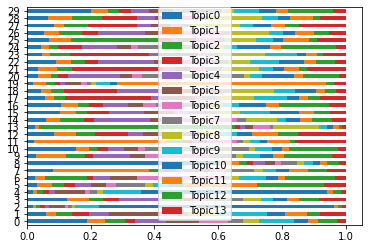

In [33]:
bardat2.plot.barh(stacked = True)

## Bar Chart: Word Counts of Topic Keywords

In [34]:
topics_df_long

,prof,topic_id,topic_words,topic,topic_prop
0,Hammerschmid1.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.761311
1,Hammerschmid2.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.546687
2,Hammerschmid3.txt,5,"['ed', 'art', 'component', 'come', 'received',...",Topic0,0.081703
3,Hammerschmid4.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.775538
4,Hammerschmid5.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.670124
...,...,...,...,...,...
11321,wegrich19.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic13,0.038309
11322,wegrich20.txt,12,"['actors', 'policy', 'eu', 'change', 'governan...",Topic13,0.048878
11323,wegrich22.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic13,0.040524
11324,wegrich21.txt,12,"['actors', 'policy', 'eu', 'change', 'governan...",Topic13,0.063656


In [ ]:
#from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# Plot Word Count and Weights of Topic Keywords
topics = topics_df["topic_words"]
topic_id = topics_df["topic_id"]
dist = topics_df["distribution"]

#too many loops -> breaks RAM 
out = []
for word in topics:
    for d in dist:
      for i in topic_id:
          out.append([word, dist, i]) #we don't have word count from the CTM -> could it be added?


df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()